In [57]:
import pandas as pd

In [58]:
#load the dataset
stock = pd.read_csv("/home/leong/Desktop/Stock analysis and predictions/GOOGL.csv")
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [59]:
#Check for dirt and clean
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Exploratory Data Analysis

In [60]:
#Describe the data
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [61]:
import matplotlib.pyplot as plt


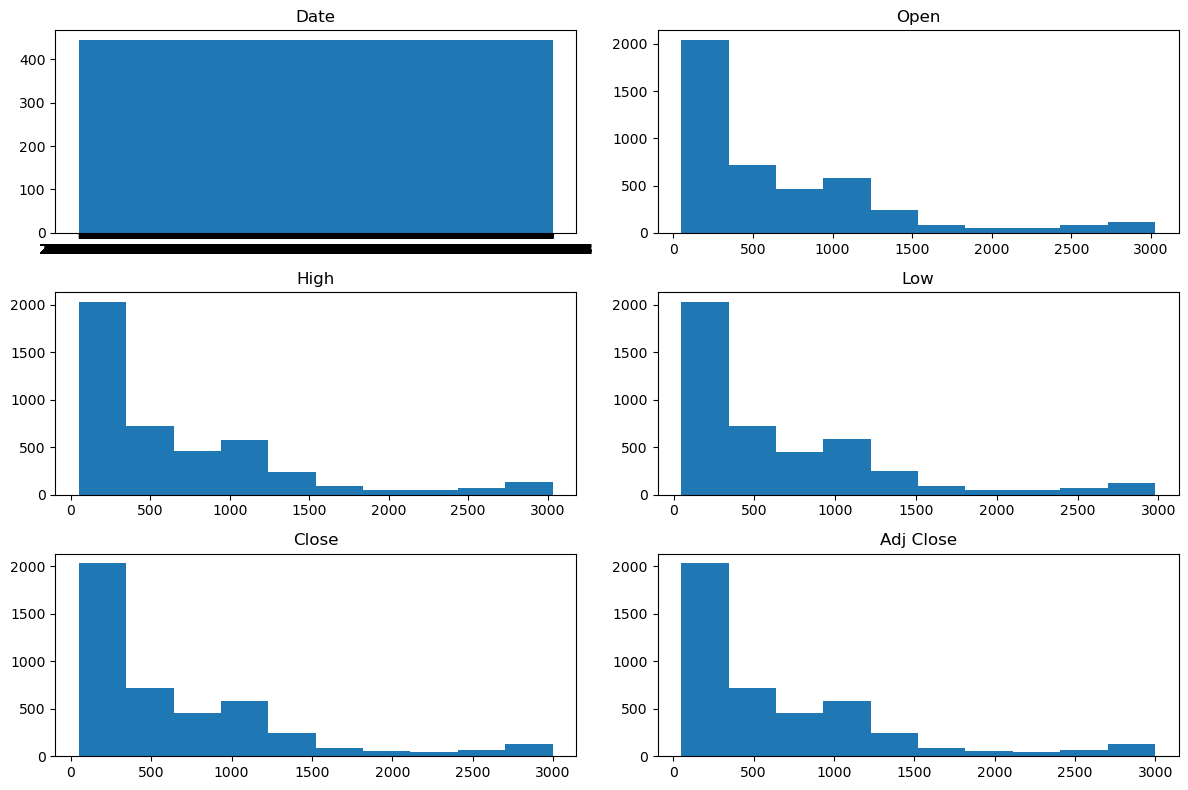

In [62]:
#isplay frequency of each entity over a oeriod of timed
columns = ["Date", "Open", "High", "Low", "Close", "Adj Close"]

# Create the histogram
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i + 1)
    plt.hist(stock[col])
    plt.title(col)

plt.tight_layout()
plt.show()

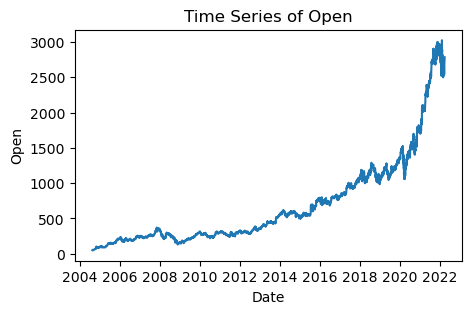

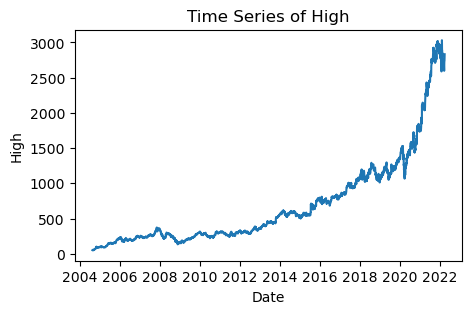

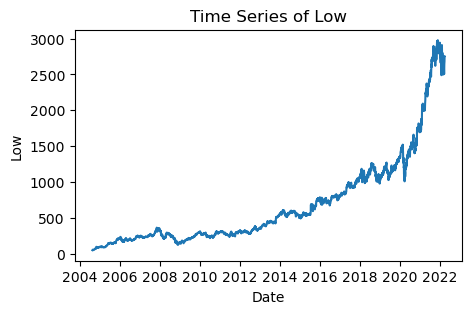

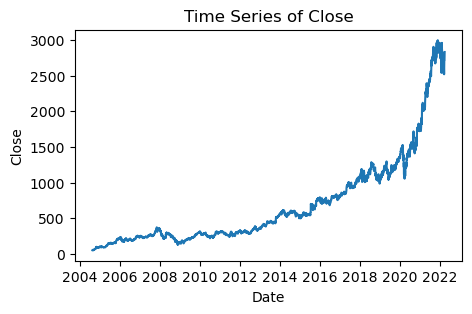

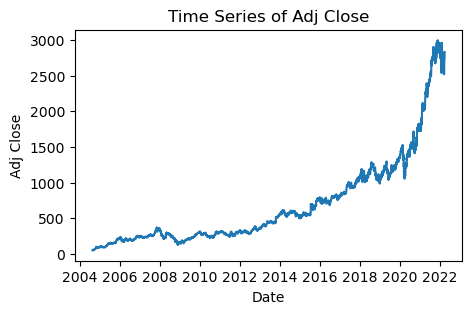

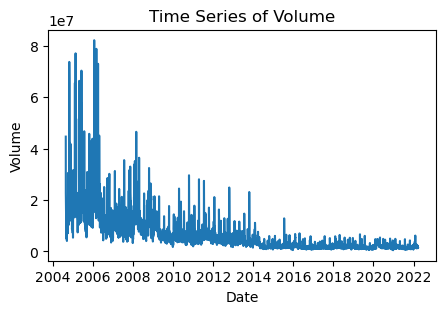

In [63]:

# Display time series of each entity 
# Extract the date column and convert to datetime format
dates = pd.to_datetime(stock["Date"], format="%Y-%m-%d")

# Create a time series plot for each column
for col in stock.columns:
    if col == "Date":
        continue 
    plt.figure(figsize=(5, 3))
    plt.plot(dates, stock[col])
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.title(f"Time Series of {col}")
    plt.show()

Calculating returns

In [64]:
#Calculating daily returns for each stock by dividing the closing price of each day by the closing price of the previous day and subtracting 1
stock['Daily Return'] = (stock['Close'] - stock['Close'].shift(1)) / stock['Close'].shift(1) - 1
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-0.920570
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,-0.989936
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,-1.041408
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.989225


In [65]:
stock.dropna(subset=['Date'], inplace=True)

In [66]:
#Calculating monthly returns by averaging the daily returns for each month.
stock['Date'] = pd.to_datetime(stock['Date'], format="%Y-%m-%d")
stock['Monthly Return'] = stock.groupby('Date')['Daily Return'].mean()
stock.head()
#Error... Only returns NANs

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Monthly Return
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-0.920570,NaN
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,-0.989936,NaN
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,-1.041408,NaN
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.989225,NaN


In [67]:
stock.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Daily Return         1
Monthly Return    4431
dtype: int64

In [68]:
# Calculate the annual returns by compounding the monthly returns
stock['Annualized Return (Formula)'] = (1 + stock['Monthly Return'].mean())**12 - 1
stock
#Error... Only returns NANs

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Monthly Return,Annualized Return (Formula)
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN,NaN
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,-0.920570,NaN,NaN
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,-0.989936,NaN,NaN
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,-1.041408,NaN,NaN
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,-0.989225,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,-0.982916,NaN,NaN
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,-1.000176,NaN,NaN
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,-0.972326,NaN,NaN
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,-1.011386,NaN,NaN


Building Predictive models

In [69]:
from sklearn.linear_model import LinearRegression
X = stock[['Open', 'High', 'Low', 'Volume']]
y = stock['Close']

model = LinearRegression()
model.fit(X, y)

# Make predictions on future data
future_prices = model.predict(X)
future_prices

array([  50.27015445,   53.58383639,   55.88209262, ..., 2800.77010395,
       2776.14349878, 2800.15192625])

In [70]:
future_dates = pd.date_range(start='2023-01-01', end='2030-12-31', freq='Y')
future_data = pd.DataFrame(index=future_dates)

# Add your future data for each year
future_data['Open'] = [100, 110, 120, 130, 140, 150, 160, 170]
future_data['High'] = [105, 115, 125, 135, 145, 155, 165, 175]
future_data['Low'] = [95, 105, 115, 125, 135, 145, 155, 165]
future_data['Volume'] = [1000, 1200, 1100, 1300, 1400, 1500, 1600, 1700]

future_prices = model.predict(future_data[['Open', 'High', 'Low', 'Volume']])
for year, price in zip(future_dates.year, future_prices):
    print(f"Year: {year}, Prediction: {price}")

Year: 2023, Prediction: 99.74037662477292
Year: 2024, Prediction: 109.75037491617118
Year: 2025, Prediction: 119.76037069744642
Year: 2026, Prediction: 129.77036898884472
Year: 2027, Prediction: 139.78036644353529
Year: 2028, Prediction: 149.79036389822588
Year: 2029, Prediction: 159.8003613529165
Year: 2030, Prediction: 169.81035880760706


Risk Analysis

In [71]:
#Standard deviation measures the volatility of a stock's price. A higher standard deviation indicates greater volatility.
std_dev = stock['Close'].std()

print(f"The standard deviation of the stock's price is: {std_dev}")

The standard deviation of the stock's price is: 645.1878060185148


In [72]:
#To-DO
#1 Backtesting Trading Strategies
#2 More on risk analysis
#3 Calculating more retuns